In [2]:
import pandas as pd
from prophet import Prophet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataframe=pd.read_csv("/content/drive/MyDrive/Dataset/AirPassengers.csv")
dataframe.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dataframe.dtypes

Month          object
#Passengers     int64
dtype: object

In [5]:
dataframe['Month']=pd.to_datetime(dataframe['Month'])
dataframe.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [6]:
dataframe.columns=['ds','y']
dataframe.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
p=Prophet(interval_width=0.92,daily_seasonality=True)
model=p.fit(dataframe)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphn1cz_ai/xgoh_hgo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphn1cz_ai/_2lvjc09.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97761', 'data', 'file=/tmp/tmphn1cz_ai/xgoh_hgo.json', 'init=/tmp/tmphn1cz_ai/_2lvjc09.json', 'output', 'file=/tmp/tmphn1cz_ai/prophet_modelt4rhcdgx/prophet_model-20230605095442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:54:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:54:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [28]:
future=p.make_future_dataframe(periods=6,freq='M')
future.tail()

,ds
145,1961-01-31
146,1961-02-28
147,1961-03-31
148,1961-04-30
149,1961-05-31


In [29]:
forecast_prediction=p.predict(future)
forecast_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
145,1961-01-31,494.685914,416.855580,495.637426,494.628815,494.731865,-40.237205,-40.237205,-40.237205,-4.176581,-4.176581,-4.176581,-36.060625,-36.060625,-36.060625,0.0,0.0,0.0,454.448708
146,1961-02-28,497.501327,460.001772,538.178858,497.387427,497.590867,1.088186,1.088186,1.088186,-4.176581,-4.176581,-4.176581,5.264767,5.264767,5.264767,0.0,0.0,0.0,498.589513
147,1961-03-31,500.618391,446.807238,527.485458,500.442096,500.767625,-12.893999,-12.893999,-12.893999,-4.176581,-4.176581,-4.176581,-8.717418,-8.717418,-8.717418,0.0,0.0,0.0,487.724392
148,1961-04-30,503.634905,461.093589,538.371047,503.392160,503.857143,-4.901960,-4.901960,-4.901960,-4.176581,-4.176581,-4.176581,-0.725380,-0.725380,-0.725380,0.0,0.0,0.0,498.732945
149,1961-05-31,506.751969,494.913737,574.385916,506.406731,507.049751,26.991993,26.991993,26.991993,-4.176581,-4.176581,-4.176581,31.168573,31.168573,31.168573,0.0,0.0,0.0,533.743962


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

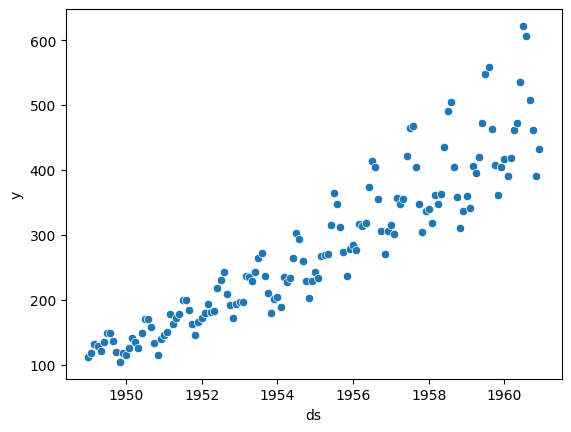

In [31]:
sns.scatterplot(x='ds', y='y', data=dataframe)
plt.show()

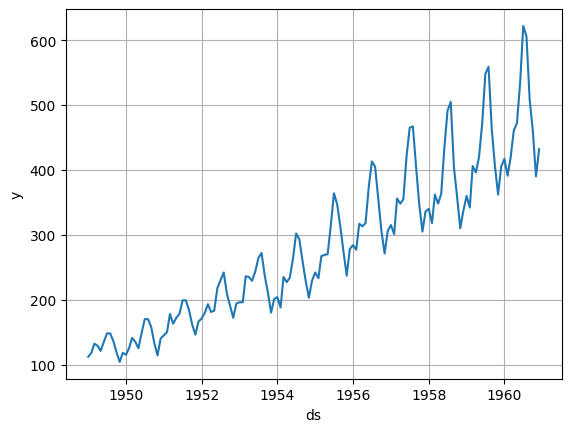

In [35]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.plot(dataframe['ds'],dataframe['y'])
ax.set(xlabel='ds', ylabel='y')
ax.grid()
plt.show()